In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\USER\Downloads\USArrests.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
data1=data.drop('Unnamed: 0',axis=1)

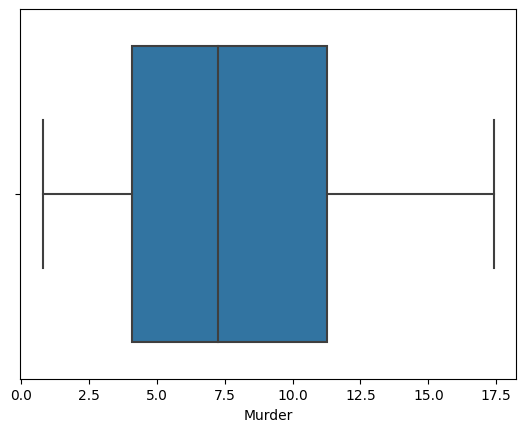

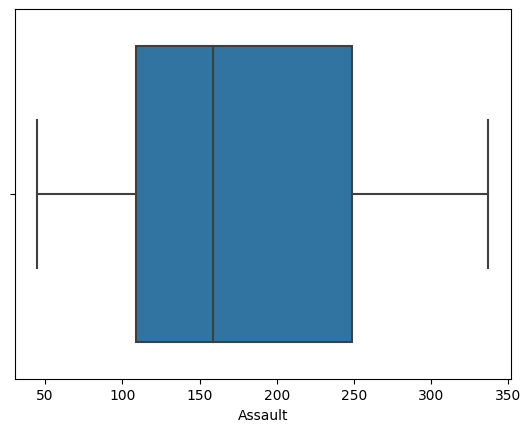

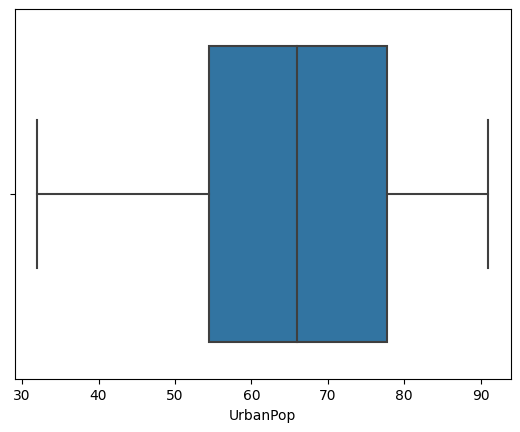

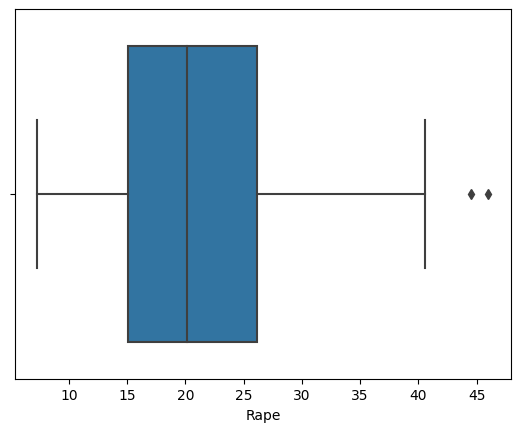

In [9]:
for i in data1:
    sns.boxplot(x=i,data=data1)
    plt.show()

In [10]:
#outliers present in rape

In [11]:
data1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [12]:
q1=15.075000
q3=26.175000

In [13]:
IQR=q3-q1

In [14]:
IQR

11.100000000000001

In [15]:
ul=q3+IQR*1.5

In [16]:
ul

42.825

In [17]:
outliers=data[(data.Rape>ul)]

In [18]:
outliers

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
27,Nevada,12.2,252,81,46.0


In [19]:
new_data=data.drop(index=[1,27])

In [20]:
new_data.shape

(48, 5)

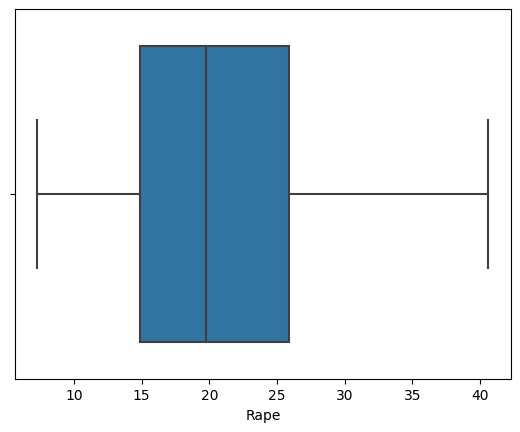

In [21]:
sns.boxplot(x='Rape',data=new_data)
plt.show()

<AxesSubplot: xlabel='Murder', ylabel='Assault'>

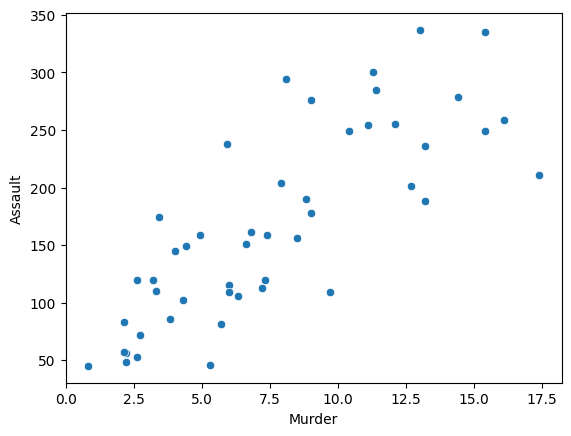

In [22]:
sns.scatterplot(x='Murder',y='Assault',data=new_data)


In [23]:
new_data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [24]:
x=new_data[['Murder', 'Assault' ,'UrbanPop', 'Rape']]


In [25]:
from sklearn.cluster import KMeans

In [26]:
km=KMeans(n_clusters=2)

In [27]:
km.fit(x)

KMeans(n_clusters=2)

In [28]:
clusters=km.predict(x)

In [29]:
clusters

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [30]:
pd.Series(clusters).value_counts()

0    29
1    19
dtype: int64

In [31]:
new_data['clusters']=clusters

In [32]:
new_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1
10,Hawaii,5.3,46,83,20.2,0


In [33]:
km.inertia_

95104.81230490019

In [34]:
all_wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss = km.inertia_
    all_wcss.append(wcss)

In [35]:
all_wcss

[338297.7289583333,
 95104.81230490019,
 46151.86357142858,
 32916.22757142858,
 22814.059453296704,
 17581.289714285715,
 14040.382412698413,
 11862.525555555556,
 10488.249857142857,
 9309.364166666666]

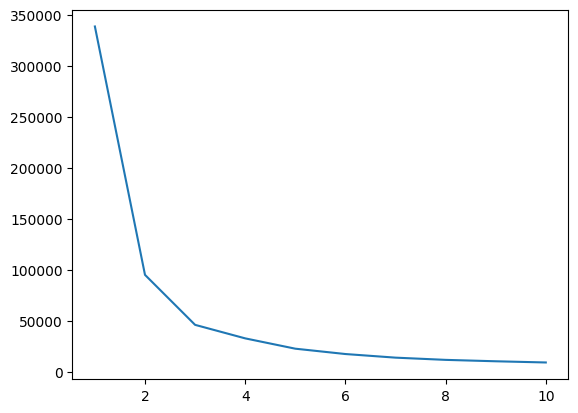

In [36]:
plt.plot(range(1,11),all_wcss)
plt.show()

In [37]:
km = KMeans(n_clusters=3)
km.fit(x)
clusters = km.predict(x)

In [38]:
new_data['clusters']=clusters

In [39]:
new_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2
10,Hawaii,5.3,46,83,20.2,1


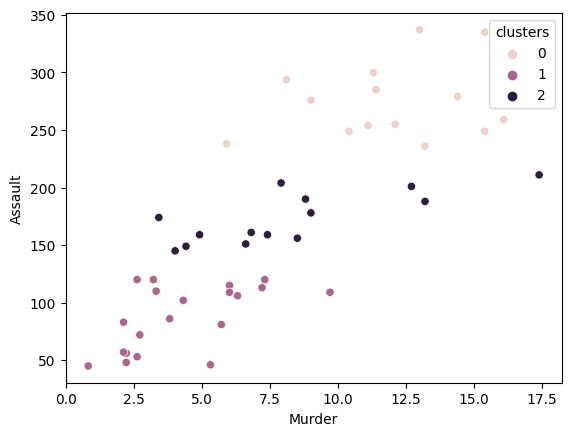

In [40]:
sns.scatterplot(x='Murder',y='Assault',data=new_data,hue="clusters")
plt.show()

In [41]:
x

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8
10,5.3,46,83,20.2


In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [43]:
mergings=linkage(x,method='complete')

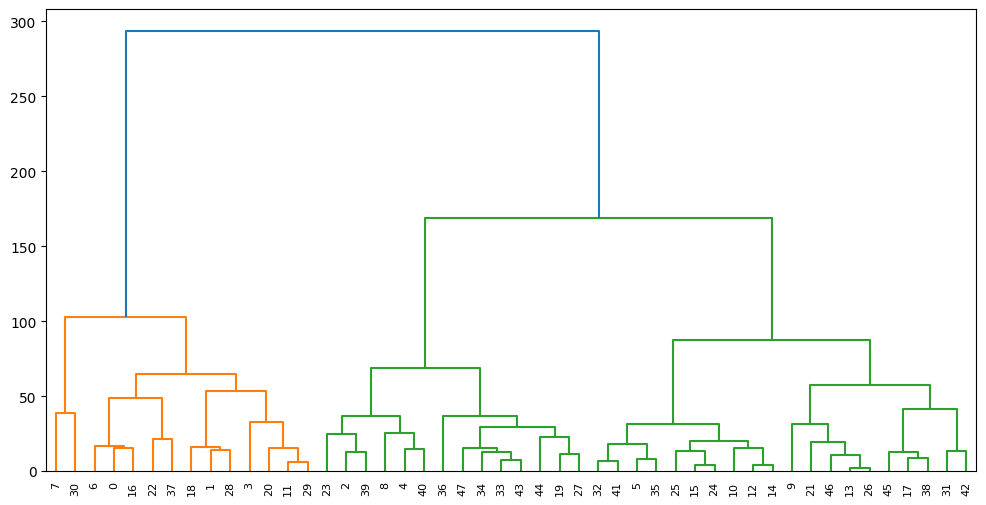

In [44]:
plt.figure(figsize=(12,6))
dendrogram(mergings)
plt.show()

In [45]:
labels = fcluster(mergings, 85, criterion='distance')

In [46]:
labels

array([2, 2, 3, 2, 3, 4, 2, 1, 3, 5, 4, 2, 4, 5, 4, 4, 2, 5, 2, 3, 2, 5,
       2, 3, 4, 4, 5, 3, 2, 2, 1, 5, 4, 3, 3, 4, 3, 2, 5, 3, 3, 4, 5, 3,
       3, 5, 5, 3], dtype=int32)

In [47]:
new_data['hc_clusters']=labels

In [48]:
new_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters,hc_clusters
0,Alabama,13.2,236,58,21.2,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,2,3
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,2,3
6,Connecticut,3.3,110,77,11.1,1,4
7,Delaware,5.9,238,72,15.8,0,2
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,2,3
10,Hawaii,5.3,46,83,20.2,1,5
